#  Tutorial 3 - Sharpe Ratio: the measure of Risk and Return Together
- Represents both the risk and return
- Developed by Nobel laureate William F. Sharpe and is used to help investors understand the return of an investment compared to its risk.

### Formula

$SR = \frac{R_p - R_f}{\sigma_p}$
- $SR$: Sharpe ratio
- $R_p$: return of portfolio
- $R_f$: risk free return
- $\sigma_p$: standard deviation of portfolio

Goal is to get high $SR$. 

### Need to understand
- Portfolio return (done in part 1)
- Risk free return
- Standard deviation of portfolio (or the risk)

### Resources
- **Risk free return** 10 Year Treasury Note https://www.treasury.gov/resource-center/data-chart-center/interest-rates/pages/textview.aspx?data=yield
- Sharpe Ratio https://www.investopedia.com/terms/s/sharperatio.asp
- Standard deviation https://www.investopedia.com/terms/s/standarddeviation.asp

In [1]:
import numpy as np
import pandas_datareader as pdr
import datetime as dt
import pandas as pd

In [2]:
tickers = ['AAPL', 'MSFT', 'TWTR', 'IBM']
start = dt.datetime(2020, 1, 1)

data = pdr.get_data_yahoo(tickers, start)

In [3]:
data.head()

Attributes  Adj Close                                         Close  \
Symbols          AAPL        MSFT       TWTR         IBM       AAPL   
Date                                                                  
2020-01-02  73.894333  157.289871  32.299999  115.726624  75.087502   
2020-01-03  73.175919  155.331329  31.520000  114.803680  74.357498   
2020-01-06  73.759003  155.732864  31.639999  114.598587  74.949997   
2020-01-07  73.412125  154.312897  32.540001  114.675476  74.597504   
2020-01-08  74.593048  156.770859  33.049999  115.632614  75.797501   

Attributes                                          High              ...  \
Symbols           MSFT       TWTR         IBM       AAPL        MSFT  ...   
Date                                                                  ...   
2020-01-02  160.619995  32.299999  129.464630  75.150002  160.729996  ...   
2020-01-03  158.619995  31.520000  128.432129  75.144997  159.949997  ...   
2020-01-06  159.029999  31.639999  128.202682  74.989998  159.100006  ...   
2020-01-07  157.580002  32.540001  128.288712  75.224998  159.669998  ...   
2020-01-08  160.089996  33.049999  129.359467  76.110001  160.800003  ...   

Attributes        Low                   Open                         \
Symbols          TWTR         IBM       AAPL        MSFT       TWTR   
Date                                                                  
2020-01-02  31.959999  128.843216  74.059998  158.779999  32.310001   
2020-01-03  31.260000  127.686424  74.287498  158.320007  31.709999   
2020-01-06  31.160000  127.342255  73.447502  157.080002  31.230000   
2020-01-07  31.719999  127.533463  74.959999  159.320007  31.799999   
2020-01-08  32.349998  128.030594  74.290001  158.929993  32.349998   

Attributes                   Volume                                     
Symbols            IBM         AAPL        MSFT        TWTR        IBM  
Date                                                                    
2020-01-02  129.063095  135480400.0  22622100.0  10721100.0  3293436.0  
2020-01-03  127.695984  146322800.0  21116200.0  14429500.0  2482890.0  
2020-01-06  127.552582  118387200.0  20813700.0  12582500.0  2537073.0  
2020-01-07  127.810707  108872000.0  21634100.0  13712900.0  3232977.0  
2020-01-08  128.594650  132079200.0  27746500.0  14632400.0  4545916.0  

[5 rows x 24 columns]

In [4]:
data = data['Adj Close']

In [5]:
data

Symbols,AAPL,MSFT,TWTR,IBM
Date,,,,
2020-01-02,73.894333,157.289871,32.299999,115.726624
2020-01-03,73.175919,155.331329,31.520000,114.803680
2020-01-06,73.759003,155.732864,31.639999,114.598587
2020-01-07,73.412125,154.312897,32.540001,114.675476
2020-01-08,74.593048,156.770859,33.049999,115.632614
...,...,...,...,...
2022-02-18,167.300003,287.929993,34.320000,124.349998
2022-02-22,164.320007,287.720001,32.930000,123.919998
2022-02-23,160.070007,280.269989,32.759998,122.070000


In [7]:
portfolio = [.25, .15, .40, .20]

In [8]:
np.sum(portfolio)

1.0

In [9]:
np.sum(np.log(data/data.shift())*portfolio, axis=1)

Date
2020-01-02    0.000000
2020-01-03   -0.015701
2020-01-06    0.003534
2020-01-07    0.008801
2020-01-08    0.014243
                ...   
2022-02-18   -0.017529
2022-02-22   -0.021833
2022-02-23   -0.015565
2022-02-24    0.037674
2022-02-25    0.011720
Length: 543, dtype: float64

In [10]:
log_return = np.sum(np.log(data/data.shift())*portfolio, axis=1)

In [11]:
log_return

Date
2020-01-02    0.000000
2020-01-03   -0.015701
2020-01-06    0.003534
2020-01-07    0.008801
2020-01-08    0.014243
                ...   
2022-02-18   -0.017529
2022-02-22   -0.021833
2022-02-23   -0.015565
2022-02-24    0.037674
2022-02-25    0.011720
Length: 543, dtype: float64

In [12]:
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


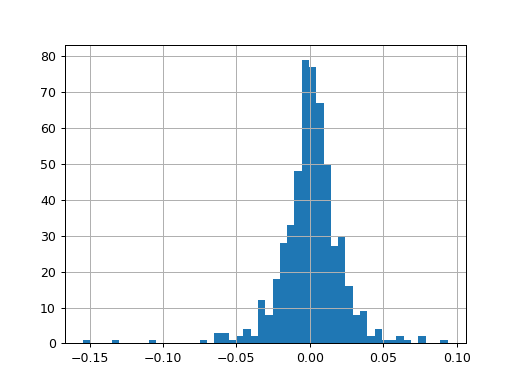

<AxesSubplot:>

In [13]:
fig, ax = plt.subplots()
log_return.hist(bins=50, ax=ax)

In [14]:
log_return.std()

0.021849543706122836

In [15]:
log_return.mean()

0.0006364935052296578

In [18]:
sharpe_ratio = log_return.mean()/log_return.std()

In [17]:
sharpe_ratio

0.0291307458769171

## ASR : Annualized Sharpe Ratio 

it euqals:
    The monthly Sharpe Ratio times the square root of 12. or
    The daily Sharpe Ratio times the square root of 252

In [19]:
asr = sharpe_ratio*252**.5

In [20]:
asr

0.46243625457685705

In [21]:
weight = np.random.random(4)
weight /= weight.sum()
weight

array([0.1317606 , 0.47947436, 0.23829479, 0.15047025])

In [22]:
log_return2 = np.sum(np.log(data/data.shift())*weight, axis=1)

In [23]:
sharpe_ratio2 = log_return2.mean()/log_return2.std()

In [24]:
asr2 = sharpe_ratio2*252**.5

In [25]:
asr2

0.6352762189105312

# End Tutorial 3